# Intro to Machine Learning
[Kaggle Micro-Course](https://www.kaggle.com/learn/intro-to-machine-learning)

#### Acquire and Peruse the Data

In [162]:
import pandas as pd

In [163]:
home_df = pd.read_csv("../assets/iowa-house-prices/train.csv")
home_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [164]:
print(home_df.shape)
home_df.describe()

(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [165]:
str_columns = home_df.select_dtypes(include=["object"]).columns.values
str_columns

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [166]:
num_columns = home_df.select_dtypes(exclude=["object"]).columns.values
num_columns

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

#### Identify NaNs
*Let's just avoid them for now...*

In [167]:
na_df = pd.DataFrame(home_df.isna().sum())
na_df.columns = ["Number of NaNs"]
na_df[na_df["Number of NaNs"] != 0]

,Number of NaNs
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


#### Set up Independent & Dependent Variables

In [168]:
features = ["LotArea", "YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
X = home_df[features]
y = home_df["SalePrice"]

#### Split the Training Set

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

#### ...and Train the Model

In [170]:
from sklearn.tree import DecisionTreeRegressor

home_model = DecisionTreeRegressor(random_state=0)
home_model.fit(X_train, y_train)
home_model_ = home_model.predict(X_val)

#### Sanity Check That We're Getting Results

In [171]:
y_val[0:5]

529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64

In [172]:
home_model_[0:5]

array([335000., 205000., 124000., 207500.,  91500.])

#### Assess the Accuracy of the Model
*Thou shalt not fall prey to in-sample pitfalls!*

In [175]:
from sklearn.metrics import mean_absolute_error

mae_simple_train = mean_absolute_error(home_model.predict(X_train), y_train)
mae_simple_val = mean_absolute_error(home_model_, y_val)

print("Training MAE: {:0.2f} | Validation MAE: {:0.2f}".format(mae_simple_train, mae_simple_val))

Training MAE: 72.79 | Validation MAE: 32410.82


#### Tune the Model
*aka the fine line between underfitting and overfitting*

In [151]:
def get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    model_ = model.predict(X_val)
    return mean_absolute_error(y_val, model_)

In [70]:
scores = { leaf_nodes:  get_mae(leaf_nodes, X_train, X_val, y_train, y_val) for leaf_nodes in range(5, 1000, 1)}
optimal_leaf_nodes = min(scores, key=scores.get)
print("Minimal MAE for max_leaf_nodes = {}".format(optimal_leaf_nodes))

Minimal MAE for max_leaf_nodes = 82


In [71]:
mae_df = pd.DataFrame().from_dict(scores, orient="index").reset_index()
mae_df.columns = ["# Leaf Nodes","MAE"]
mae_df.head()

,# Leaf Nodes,MAE
0,5,35190.336708
1,6,33967.190367
2,7,33636.877992
3,8,31908.715163
4,9,31416.589415


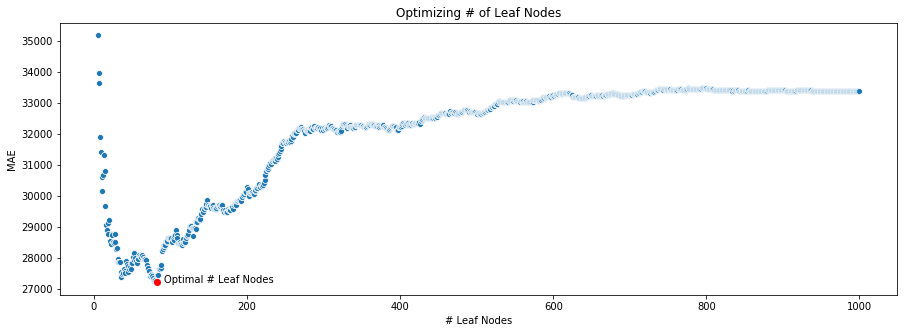

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.scatterplot(x="# Leaf Nodes", y="MAE", data=mae_df)
plt.plot(optimal_leaf_nodes, scores[optimal_leaf_nodes], 'ro')
plt.text(optimal_leaf_nodes + 10, scores[optimal_leaf_nodes], "Optimal # Leaf Nodes")
plt.title("Optimizing # of Leaf Nodes")
plt.show()

#### Create Model Using Optimal Parameters & Fit to Data

In [177]:
home_model = DecisionTreeRegressor(max_leaf_nodes=optimal_leaf_nodes, random_state=0)
home_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=82, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [178]:
home_model.fit(X, y)
home_model_ = home_model.predict(X)
home_model_[0:5]

array([209133.65384615, 146415.0075188 , 209133.65384615, 143297.46666667,
       280931.25      ])

In [179]:
mae_simple_optimized = mean_absolute_error(home_model_, y)
print("MAE: {:0.2f}".format(mae_simple_optimized))

MAE: 17776.10


#### Experiment with Alternative Models

In [180]:
from sklearn.ensemble import RandomForestRegressor

rf_home_model = RandomForestRegressor(random_state=0)
rf_home_model.fit(X_train, y_train)
rf_home_model_ = rf_home_model.predict(X_val)

mae_rf = mean_absolute_error(y_val, rf_home_model_)
print("Random Forest MAE: {:0.2f}".format(mae_rf))

Random Forest MAE: 24396.51


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Deal with Missing Values
*a) Drop b) Impute c) Impute with Boolean*

In [157]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [94]:
cols_with_nans = [col for col in home_df.columns if home_df[col].isnull().any()]
num_nans = home_df[cols_with_nans].isna().sum()
pd.DataFrame(data=[num_nans])

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,259,1369,8,8,37,37,38,37,38,1,690,81,81,81,81,81,1453,1179,1406


In [195]:
# Get fresh data
X = pd.read_csv("../assets/iowa-house-prices/train.csv")
y = X["SalePrice"]
X.drop(columns=["SalePrice"], inplace=True, axis=0)
X.shape

(1460, 80)

In [196]:
# Simplify by removing non-numeric columns
X = X.select_dtypes(exclude=["object"])
X.shape

(1460, 37)

In [197]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [198]:
missing_data_cols = X.isna().sum()
missing_data_cols = missing_data_cols[missing_data_cols > 0]
missing_data_cols

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [199]:
missing_data_cols.index.to_list()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [200]:
# Let's try dropping columns with missing values
X_train_dropped = X_train.drop(columns=missing_data_cols_list)
X_valid_dropped = X_valid.drop(columns=missing_data_cols_list)

In [201]:
from sklearn.ensemble import RandomForestRegressor

mae_dropped = score_dataset(X_train_dropped, X_valid_dropped, y_train, y_valid)
print("MAE (Missing Values Dropped)", mae_dropped)

MAE (Missing Values Dropped) 17952.591404109586


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [205]:
# Let's try imputing the missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train))
X_valid_imputed = pd.DataFrame(imputer.transform(X_valid))

X_train_imputed.columns = X_train.columns.values
X_valid_imputed.columns = X_valid.columns.values

mae_imputed = score_dataset(X_train_imputed, X_valid_imputed, y_train, y_valid)
print("MAE (Missing Values Imputed)", mae_imputed)

MAE (Missing Values Imputed) 18250.608013698627


#### Compare MAE Scores

In [208]:
score_df = pd.DataFrame(data={"MAE (Val)": [mae_simple_val, mae_simple_optimized, mae_rf, mae_dropped, 
                                      mae_imputed]},
                        index=["Decision Tree", "Decision Tree Optimized", "Random Forest", 
                               "Random Forest (Missing Values Dropped)", "Random Forest (Missing Values Imputed)"])
score_df

,MAE (Val)
Decision Tree,32410.824658
Decision Tree Optimized,17776.101859
Random Forest,24396.513744
Random Forest (Missing Values Dropped),17952.591404
Random Forest (Missing Values Imputed),18250.608014
